In [136]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

DIR = os.getcwd() + "\\imgs"

SIGNS = ["rock", "paper", "scissors", "quit", "none"]
IMG_SIZE = 50

train_data = []

for sign in SIGNS:
  path = os.path.join(DIR, sign)
  label = SIGNS.index(sign)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), 0)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    train_data.append([img_array, label])


In [137]:
import random

random.shuffle(train_data)

X, Y = [], []

for x, y in train_data:
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1, IMG_SIZE,  IMG_SIZE, 1)
Y = np.array(Y)

In [138]:
import tensorflow.keras.layers as ly
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(ly.Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(ly.Activation("relu"))

model.add(ly.Conv2D(32, (3, 3), activation="relu"))
model.add(ly.MaxPooling2D((2, 2)))
model.add(ly.Dropout(0.5))

model.add(ly.Flatten())
model.add(ly.Dense(128, activation="relu"))
model.add(ly.Dropout(0.5))
model.add(ly.Dense(5, activation="softmax"))

In [139]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [140]:
import time

NAME = "TH_LAYER_{}".format(int(time.time()))
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME),
                                             histogram_freq=1,
                                             profile_batch=100000000)

In [142]:
model.fit(X, Y, epochs=20, callbacks=[tensorboard])

Train on 7542 samples
Epoch 1/20
7542/7542 [==============================] - 34s 5ms/sample - loss: 0.0577 - acc: 0.9851
Epoch 2/20
7542/7542 [==============================] - 30s 4ms/sample - loss: 0.0453 - acc: 0.9874
Epoch 3/20
7542/7542 [==============================] - 31s 4ms/sample - loss: 0.0421 - acc: 0.9875
Epoch 4/20
7542/7542 [==============================] - 30s 4ms/sample - loss: 0.0398 - acc: 0.9875
Epoch 5/20
7542/7542 [==============================] - 30s 4ms/sample - loss: 0.0334 - acc: 0.9914
Epoch 6/20
7542/7542 [==============================] - 33s 4ms/sample - loss: 0.0414 - acc: 0.9902
Epoch 7/20
7542/7542 [==============================] - 30s 4ms/sample - loss: 0.0380 - acc: 0.9889
Epoch 8/20
7542/7542 [==============================] - 30s 4ms/sample - loss: 0.0288 - acc: 0.9915
Epoch 9/20
7542/7542 [==============================] - 31s 4ms/sample - loss: 0.0371 - acc: 0.9898
Epoch 10/20
7542/7542 [==============================] - 30s 4ms/sample - loss

In [143]:
model.save("RPS.model")

In [144]:
def prepare(file):
    img = cv2.imread(file, 0)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    r, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
    return img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

def thresh(file, th=127):
    img = cv2.imread(file, 0)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    r, img = cv2.threshold(img, th, 255, cv2.THRESH_BINARY_INV)
    return img

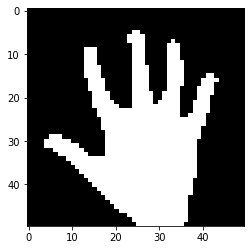

In [148]:
img = "imgs/test/img1.png"
new_img = prepare(img)
plt.imshow(thresh(img, 132), cmap="binary")
plt.show()

In [149]:
# model = tf.keras.models.load_model("RPS.model")

In [150]:
prediction = model.predict(new_img)
print(SIGNS[np.argmax(prediction[0])])

paper
